# Download and prepare the CIFAR10 dataset

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 217s 1us/step


In [3]:
train_images[0,1]

array([[ 16,  20,  20],
       [  0,   0,   0],
       [ 18,   8,   0],
       [ 51,  27,   8],
       [ 88,  51,  21],
       [120,  82,  43],
       [128,  89,  45],
       [127,  86,  44],
       [126,  87,  50],
       [116,  79,  44],
       [106,  70,  37],
       [101,  67,  35],
       [105,  70,  36],
       [113,  74,  35],
       [109,  70,  33],
       [112,  72,  37],
       [119,  79,  44],
       [109,  71,  33],
       [105,  69,  27],
       [125,  89,  46],
       [127,  92,  46],
       [122,  85,  39],
       [131,  89,  47],
       [124,  82,  41],
       [121,  79,  37],
       [131,  89,  48],
       [132,  91,  53],
       [133,  94,  58],
       [133,  96,  60],
       [123,  88,  55],
       [119,  83,  50],
       [122,  87,  57]], dtype=uint8)

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
train_images[0,1]

array([[0.0627451 , 0.07843137, 0.07843137],
       [0.        , 0.        , 0.        ],
       [0.07058824, 0.03137255, 0.        ],
       [0.2       , 0.10588235, 0.03137255],
       [0.34509804, 0.2       , 0.08235294],
       [0.47058824, 0.32156863, 0.16862745],
       [0.50196078, 0.34901961, 0.17647059],
       [0.49803922, 0.3372549 , 0.17254902],
       [0.49411765, 0.34117647, 0.19607843],
       [0.45490196, 0.30980392, 0.17254902],
       [0.41568627, 0.2745098 , 0.14509804],
       [0.39607843, 0.2627451 , 0.1372549 ],
       [0.41176471, 0.2745098 , 0.14117647],
       [0.44313725, 0.29019608, 0.1372549 ],
       [0.42745098, 0.2745098 , 0.12941176],
       [0.43921569, 0.28235294, 0.14509804],
       [0.46666667, 0.30980392, 0.17254902],
       [0.42745098, 0.27843137, 0.12941176],
       [0.41176471, 0.27058824, 0.10588235],
       [0.49019608, 0.34901961, 0.18039216],
       [0.49803922, 0.36078431, 0.18039216],
       [0.47843137, 0.33333333, 0.15294118],
       [0.

# Verify the data

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
train_labels[0][0]

6

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

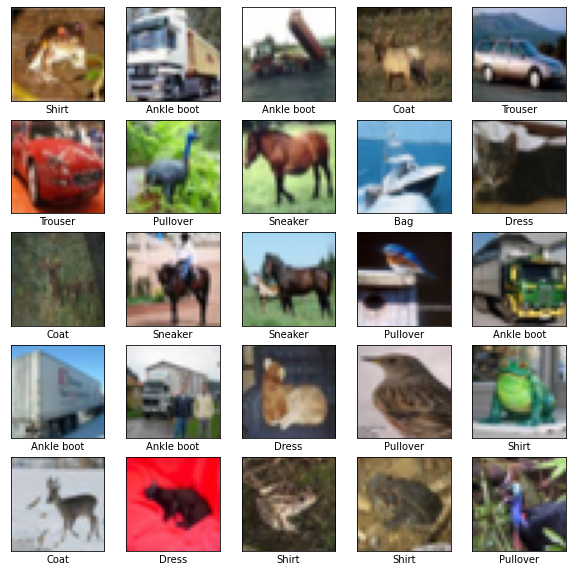

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
train_images.shape

(50000, 32, 32, 3)

# Create the convolutional base

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5464 - accuracy: 0.4327 - val_loss: 1.2609 - val_accuracy: 0.5437
Epoch 2/10
1563/1563 [==============================] - 129s 83ms/step - loss: 1.0272 - accuracy: 0.6404 - val_loss: 1.0183 - val_accuracy: 0.6372
Epoch 4/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.9327 - accuracy: 0.6734 - val_loss: 1.0009 - val_accuracy: 0.6507
Epoch 5/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.8616 - accuracy: 0.6989 - val_loss: 0.9457 - val_accuracy: 0.6744
Epoch 6/10
1563/1563 [==============================] - 132s 84ms/step - loss: 0.8062 - accuracy: 0.7200 - val_loss: 0.8846 - val_accuracy: 0.6973
Epoch 7/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.7545 - accuracy: 0.7371 - val_loss: 0.9006 - val_accuracy: 0.6922
Epoch 8/10
1563/1563 [==============================] - 118s 76ms/step - loss: 0.7129 - accuracy: 0.7519 - val_loss: 0

# Evaluate the model

313/313 - 6s - loss: 0.9314 - accuracy: 0.6936


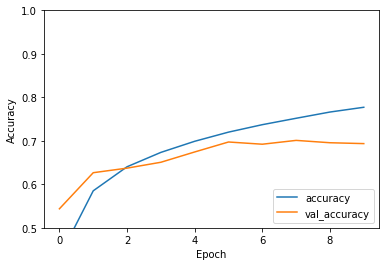

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss1, test_acc1 = model.evaluate(test_images,  test_labels, verbose=2)

In [17]:
print(test_acc1)

0.6935999989509583


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history1 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 179s 115ms/step - loss: 1.4563 - accuracy: 0.4723 - val_loss: 1.2198 - val_accuracy: 0.5665
Epoch 2/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.0855 - accuracy: 0.6171 - val_loss: 1.0026 - val_accuracy: 0.6536
Epoch 3/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.9297 - accuracy: 0.6722 - val_loss: 0.9690 - val_accuracy: 0.6686
Epoch 4/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.8155 - accuracy: 0.7120 - val_loss: 0.9983 - val_accuracy: 0.6591
Epoch 5/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.7285 - accuracy: 0.7451 - val_loss: 0.9134 - val_accuracy: 0.6925
Epoch 6/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.6527 - accuracy: 0.7688 - val_loss: 0.9131 - val_accuracy: 0.6936
Epoch 7/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.5853 - accuracy: 0.7945 - val_loss: 

313/313 - 4s - loss: 1.0519 - accuracy: 0.6941


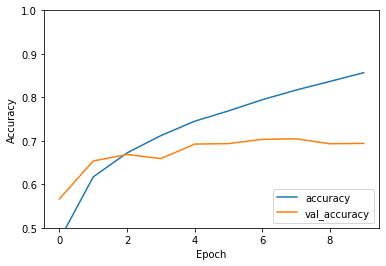

In [21]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model.evaluate(test_images,  test_labels, verbose=2)

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
history2 = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 79s 51ms/step - loss: 1.5382 - accuracy: 0.4368 - val_loss: 1.3020 - val_accuracy: 0.5249
Epoch 2/20
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1656 - accuracy: 0.5877 - val_loss: 1.0874 - val_accuracy: 0.6204
Epoch 3/20
1563/1563 [==============================] - 90s 57ms/step - loss: 1.0034 - accuracy: 0.6484 - val_loss: 0.9726 - val_accuracy: 0.6599
Epoch 4/20
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9064 - accuracy: 0.6839 - val_loss: 0.9281 - val_accuracy: 0.6764
Epoch 5/20
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8406 - accuracy: 0.7053 - val_loss: 0.8938 - val_accuracy: 0.6960
Epoch 6/20
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7784 - accuracy: 0.7301 - val_loss: 0.8801 - val_accuracy: 0.6981
Epoch 7/20
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7340 - accuracy: 0.7445 - val_loss: 0.8606 -

313/313 - 4s - loss: 0.9738 - accuracy: 0.7235


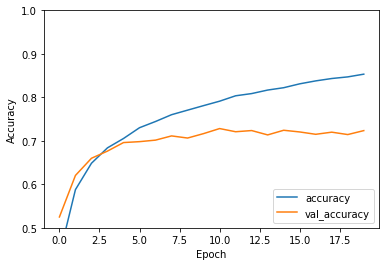

In [25]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss3, test_acc3 = model.evaluate(test_images,  test_labels, verbose=2)

C:\Users\youne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


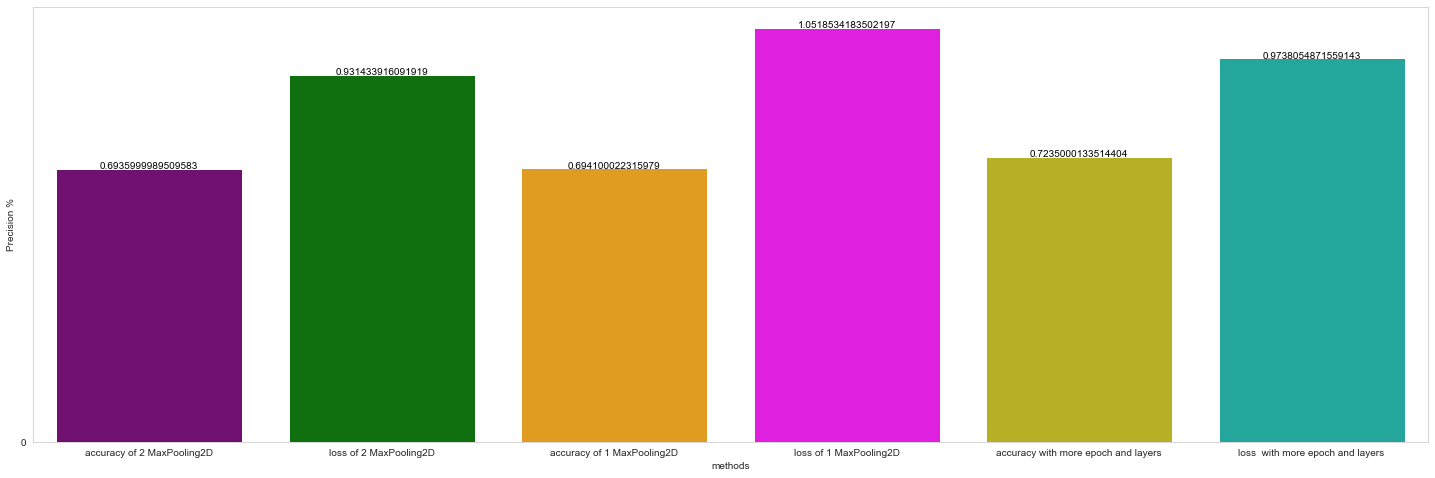

In [26]:
import seaborn as sns
import numpy as np
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
X=['accuracy of 2 MaxPooling2D','loss of 2 MaxPooling2D','accuracy of 1 MaxPooling2D','loss of 1 MaxPooling2D','accuracy with more epoch and layers','loss  with more epoch and layers']
Y=[test_acc1 , test_loss1 , test_acc2 , test_loss2 , test_acc3 , test_loss3]
sns.set_style("whitegrid")
plt.figure(figsize=(25,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Precision %")
plt.xlabel("methods")
g=sns.barplot(X, Y, palette=colors)
for i in range(len(Y)):
    g.text(i, Y[i],Y[i],color='black', ha="center")
plt.show()